In [34]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from itertools import cycle
import random
sns.set_style('darkgrid')
plt.rcParams['image.cmap'] = 'autumn'

# DRILL: Mo' blobs, mo' problems?

You've seen how these three methods work on three blobs of reasonably separated data. Now go back and change the data. Create more or fewer blobs, and set the blobs closer together or farther apart. Set up at least three different blob configuations, then run the four methods ($k$-means, mean shift, spectral clustering and affinity propagation) on each one.  Write up a report for your mentor where you discuss what you learned about the clustering methods based on their relative performance for your different blob setups. 

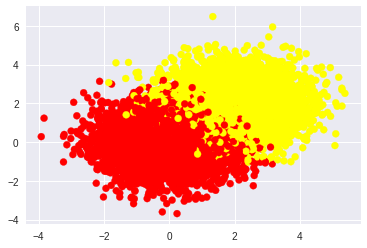

In [35]:
#Blobs configuration 1: two blobs, kind of close together with overlap.
centers1 = [[0, 0], [2, 2]]
X1, y1 = make_blobs(
    n_samples=10000,
    centers=centers1,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X1[:, 0], X1[:, 1], c=y1)
plt.show()

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1,
    y1,
    test_size=0.9,
    random_state=42)

In [3]:
random.seed(552)
print(random.random())
print(random.random())
print(random.random())

0.021231708991590548
0.07463740305972888
0.5007420612750013


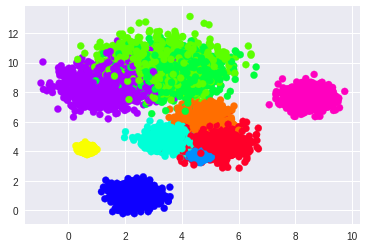

In [4]:
#Blobs configuration 2: many blobs, varying locations, varying tightness
centers2 = []
stds = []
for n in range(0, 10):
    random.seed(n*n)
    centers2.append([random.random()*10, random.random()*10])
    stds.append(random.random())
X2, y2 = make_blobs(
    n_samples=10000,
    centers=centers2,
    cluster_std=stds,
    n_features=2,
    random_state=42)

plt.scatter(X2[:, 0], X2[:, 1], c=y2, cmap='gist_rainbow_r')
plt.show()

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2,
    y2,
    test_size=0.9,
    random_state=42)

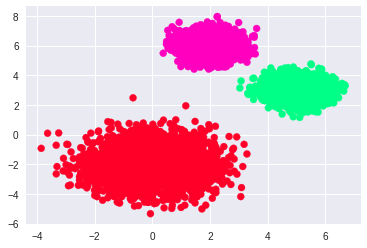

In [5]:
#Blobs configuration 3: 3 blobs, clearly defined
centers3 = [[2, 6], [5, 3], [0, -2]]
stds = [.5, .5, 1]

X3, y3 = make_blobs(
    n_samples=10000,
    centers=centers3,
    cluster_std=stds,
    n_features=2,
    random_state=42)

plt.scatter(X3[:, 0], X3[:, 1], c=y3, cmap='gist_rainbow_r')
plt.show()

X3_train, X3_test, y3_train, y3_test = train_test_split(
    X3,
    y3,
    test_size=0.9,
    random_state=42)

# Mean-shift

Number of estimated clusters: 2


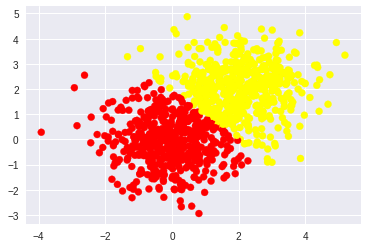

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0      465   47
1       26  462


In [10]:
#Blob config 1

bandwidth1 = estimate_bandwidth(X1_train, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth1, bin_seeding=True)
ms.fit(X1_train)

labels = ms.labels_

cluster_centers = ms.cluster_centers_

n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

plt.scatter(X1_train[:, 0], X1_train[:, 1], c=labels, cmap='autumn')
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y1_train,labels))

Number of estimated clusters: 4


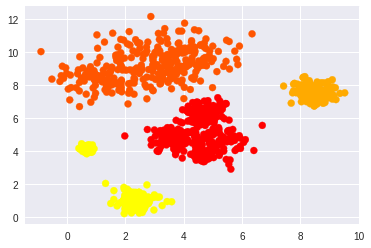

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0        0    0  112    0
1        0  109    0    0
2        0    0    0  101
3      102    0    0    0
4       88    0    0    0
5        1  102    0    0
6        0   99    0    0
7        0    0    0   88
8      109    1    0    0
9       88    0    0    0


In [22]:
#Blob config 2

bandwidth2 = estimate_bandwidth(X2_train, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth2, bin_seeding=True)
ms.fit(X2_train)

labels = ms.labels_

cluster_centers = ms.cluster_centers_

n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

plt.scatter(X2_train[:, 0], X2_train[:, 1], c=labels, cmap='autumn')
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y2_train,labels))

Number of estimated clusters: 4


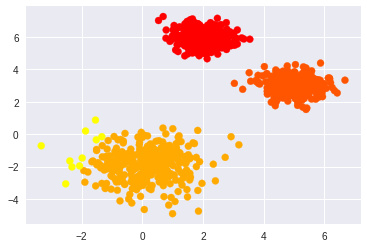

Comparing the assigned categories to the ones in the data:
col_0    0    1    2   3
row_0                   
0      362    0    0   0
1        0  320    0   0
2        0    0  308  10


In [17]:
#Blob config 3

bandwidth3 = estimate_bandwidth(X3_train, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth3, bin_seeding=True)
ms.fit(X3_train)

labels = ms.labels_

cluster_centers = ms.cluster_centers_

n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

plt.scatter(X3_train[:, 0], X3_train[:, 1], c=labels, cmap='autumn')
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y3_train,labels))

## Spectral clustering

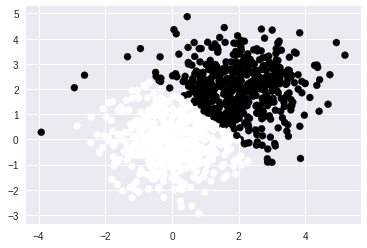

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0      465   47
1       28  460


In [24]:
n_clusters=2
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X1_train)

predict=sc.fit_predict(X1_train)

plt.scatter(X1_train[:, 0], X1_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y1_train,predict))

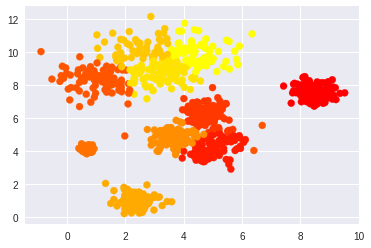

Comparing the assigned categories to the ones in the data:
col_0    0    1    2   3   4   5    6   7   8   9
row_0                                            
0      112    0    0   0   0   0    0   0   0   0
1        0    0    0  87   0   0    0   8  14   0
2        0    0    0   0   0   0  101   0   0   0
3        0  102    0   0   0   0    0   0   0   0
4        0    3    1   1   0  83    0   0   0   0
5        0    0    2   1   0   0    0  15  49  36
6        0    0    0   1   0   0    0  33  23  42
7        0    0    0   0  88   0    0   0   0   0
8        0    0  109   0   0   1    0   0   0   0
9        0   63   10   2   0  13    0   0   0   0


In [36]:
n_clusters=10
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X2_train)

predict=sc.fit_predict(X2_train)

plt.scatter(X2_train[:, 0], X2_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y2_train,predict))

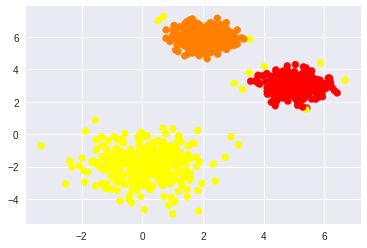

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0        0  359    3
1      313    0    7
2        0    0  318


In [37]:
n_clusters=3
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X3_train)

predict=sc.fit_predict(X3_train)

plt.scatter(X3_train[:, 0], X3_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y3_train,predict))

## Affinity propagation

Done
Estimated number of clusters: 35


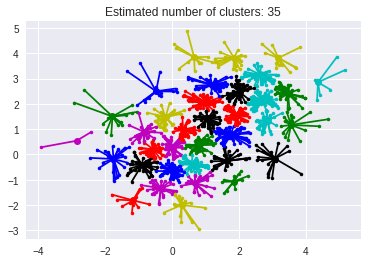

In [40]:
af = AffinityPropagation().fit(X1_train)
print('Done')

cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))


plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X1_train[cluster_centers_indices[k]]
    plt.plot(X1_train[class_members, 0], X1_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for X1 in X1_train[class_members]:
        plt.plot([cluster_center[0], X1[0]], [cluster_center[1], X1[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

Done
Estimated number of clusters: 11


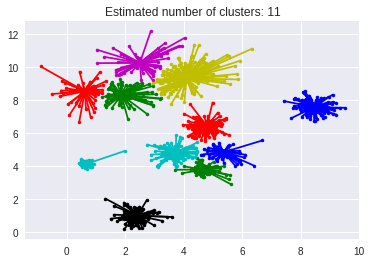

In [52]:
af = AffinityPropagation().fit(X2_train)
print('Done')

cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))


plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X2_train[cluster_centers_indices[k]]
    plt.plot(X2_train[class_members, 0], X2_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for X2 in X2_train[class_members]:
        plt.plot([cluster_center[0], X2[0]], [cluster_center[1], X2[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

Done
Estimated number of clusters: 62


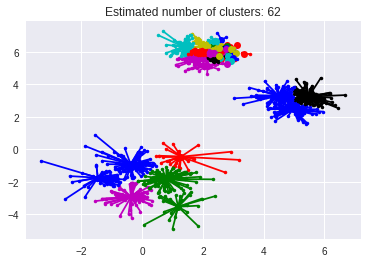

In [47]:
af = AffinityPropagation().fit(X3_train)
print('Done')

cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))


plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X3_train[cluster_centers_indices[k]]
    plt.plot(X3_train[class_members, 0], X3_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for X3 in X3_train[class_members]:
        plt.plot([cluster_center[0], X3[0]], [cluster_center[1], X3[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

Without tuning, affinity propogation is pretty awful. When I increase the damping parameter, it starts to do better. The third configuration, for example: